In [ ]:
!git clone https://github.com/RajasBhope/Track

fatal: destination path 'Track' already exists and is not an empty directory.


In [ ]:
!ls Track

driving_log.csv  IMG


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow
import keras
from keras.models import Sequential
from keras.layers import Convolution2D, Conv2D, MaxPooling2D, Dropout, Flatten, Dense, concatenate
from tensorflow.keras.optimizers import Adam
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import cv2
import pandas as pd
import ntpath
import random


In [ ]:
u9 = tensorflow.keras.layers.concatenate(axis=3)([)

In [ ]:
datadir='Track'
columns=[ 'center','left','right','steering','throttle','reverse','speed']
data=pd.read_csv(os.path.join(datadir, 'driving_log.csv'), names=columns)
pd.set_option('display.max_colwidth',-1)
data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  after removing the cwd from sys.path.


,center,left,right,steering,throttle,reverse,speed
0,C:\SelfDrivingMaterials\UDACITY\IMAGE_DATA\IMG\center_2022_07_22_17_23_37_606.jpg,C:\SelfDrivingMaterials\UDACITY\IMAGE_DATA\IMG\left_2022_07_22_17_23_37_606.jpg,C:\SelfDrivingMaterials\UDACITY\IMAGE_DATA\IMG\right_2022_07_22_17_23_37_606.jpg,0.00,0.000000,0.0,0.000006
1,C:\SelfDrivingMaterials\UDACITY\IMAGE_DATA\IMG\center_2022_07_22_17_23_37_684.jpg,C:\SelfDrivingMaterials\UDACITY\IMAGE_DATA\IMG\left_2022_07_22_17_23_37_684.jpg,C:\SelfDrivingMaterials\UDACITY\IMAGE_DATA\IMG\right_2022_07_22_17_23_37_684.jpg,0.00,0.000000,0.0,0.000014
2,C:\SelfDrivingMaterials\UDACITY\IMAGE_DATA\IMG\center_2022_07_22_17_23_37_764.jpg,C:\SelfDrivingMaterials\UDACITY\IMAGE_DATA\IMG\left_2022_07_22_17_23_37_764.jpg,C:\SelfDrivingMaterials\UDACITY\IMAGE_DATA\IMG\right_2022_07_22_17_23_37_764.jpg,-0.05,0.078865,0.0,0.053495
3,C:\SelfDrivingMaterials\UDACITY\IMAGE_DATA\IMG\center_2022_07_22_17_23_37_843.jpg,C:\SelfDrivingMaterials\UDACITY\IMAGE_DATA\IMG\left_2022_07_22_17_23_37_843.jpg,C:\SelfDrivingMaterials\UDACITY\IMAGE_DATA\IMG\right_2022_07_22_17_23_37_843.jpg,-0.25,0.316315,0.0,0.228255
4,C:\SelfDrivingMaterials\UDACITY\IMAGE_DATA\IMG\center_2022_07_22_17_23_37_923.jpg,C:\SelfDrivingMaterials\UDACITY\IMAGE_DATA\IMG\left_2022_07_22_17_23_37_923.jpg,C:\SelfDrivingMaterials\UDACITY\IMAGE_DATA\IMG\right_2022_07_22_17_23_37_923.jpg,0.00,0.557899,0.0,0.687588


In [ ]:
def path_leaf(path):
  head, tail= ntpath.split(path)
  return tail
data['center']= data['center'].apply(path_leaf)
data['left']= data['left'].apply(path_leaf)
data['right']= data['right'].apply(path_leaf)
data.head()



,center,left,right,steering,throttle,reverse,speed
0,center_2022_07_22_17_23_37_606.jpg,left_2022_07_22_17_23_37_606.jpg,right_2022_07_22_17_23_37_606.jpg,0.00,0.000000,0.0,0.000006
1,center_2022_07_22_17_23_37_684.jpg,left_2022_07_22_17_23_37_684.jpg,right_2022_07_22_17_23_37_684.jpg,0.00,0.000000,0.0,0.000014
2,center_2022_07_22_17_23_37_764.jpg,left_2022_07_22_17_23_37_764.jpg,right_2022_07_22_17_23_37_764.jpg,-0.05,0.078865,0.0,0.053495
3,center_2022_07_22_17_23_37_843.jpg,left_2022_07_22_17_23_37_843.jpg,right_2022_07_22_17_23_37_843.jpg,-0.25,0.316315,0.0,0.228255
4,center_2022_07_22_17_23_37_923.jpg,left_2022_07_22_17_23_37_923.jpg,right_2022_07_22_17_23_37_923.jpg,0.00,0.557899,0.0,0.687588


[-1.   -0.92 -0.84 -0.76 -0.68 -0.6  -0.52 -0.44 -0.36 -0.28 -0.2  -0.12
 -0.04  0.04  0.12  0.2   0.28  0.36  0.44  0.52  0.6   0.68  0.76  0.84
  0.92  1.  ]


([<matplotlib.lines.Line2D at 0x7f5ebdad2d90>], (200, 200))

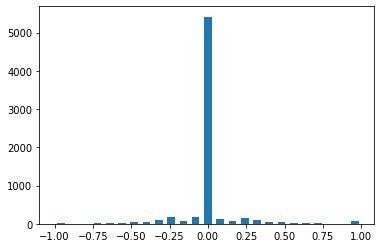

In [ ]:
num_bins=25
samples_per_bin=200
hist, bins= np.histogram(data['steering'], num_bins)
center= (bins[:-1]+ bins[1:]) *0.5
print(bins)
plt.bar(center, hist, width=0.05)
plt.plot(np.min(data['steering']), np.max(data['steering'])), (samples_per_bin, samples_per_bin)

total data: 6834
removed: 5217
Remaining: 1617


([<matplotlib.lines.Line2D at 0x7f5ebd888250>], (200, 200))

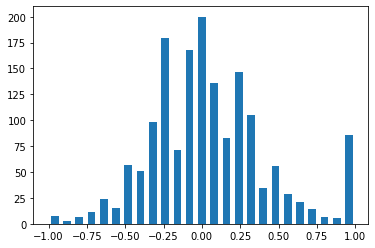

In [ ]:
print('total data:', len(data))
remove_list=[]
for j in range(num_bins):
  list_=[]
  for i in range (len(data['steering'])):
    if data['steering'][i] >= bins[j] and data['steering'][i] <= bins[j+1]:
      list_.append(i)
  list_ = shuffle(list_)
  list_ = list_[samples_per_bin:]
  remove_list.extend(list_)

print('removed:', len(remove_list))
data.drop(data.index[remove_list], inplace=True)
print('Remaining:', len(data))

hist, _= np.histogram(data['steering'], (num_bins))
plt.bar(center, hist, width=0.05)
plt.plot(np.min(data['steering']), np.max(data['steering'])), (samples_per_bin, samples_per_bin)


In [ ]:
print(data.iloc[1])
def load_img_steering(datadir, df):
  image_path=[]
  steering=[]
  for i in range(len(data)):
    indexed_data = data.iloc[i]
    center, left, right = indexed_data[0], indexed_data[1], indexed_data[2]
    image_path.append(os.path.join(datadir, center.strip()))
    steering.append(float(indexed_data[3]))
  image_paths = np.asarray(image_path)
  steerings = np.asarray(steering)
  return image_paths, steerings

image_paths, steerings = load_img_steering(datadir + '/IMG', data)

center      center_2022_07_22_17_23_37_843.jpg
left        left_2022_07_22_17_23_37_843.jpg  
right       right_2022_07_22_17_23_37_843.jpg 
steering   -0.25                              
throttle    0.316315                          
reverse     0.0                               
speed       0.228255                          
Name: 3, dtype: object


In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(image_paths, steerings, test_size= 0.2, random_state=6 )
print('Training Samples: {}\nValid Samples: {}'.format(len(X_train), len(X_valid)))

Training Samples: 1293
Valid Samples: 324


Text(0.5, 1.0, 'Validation set')

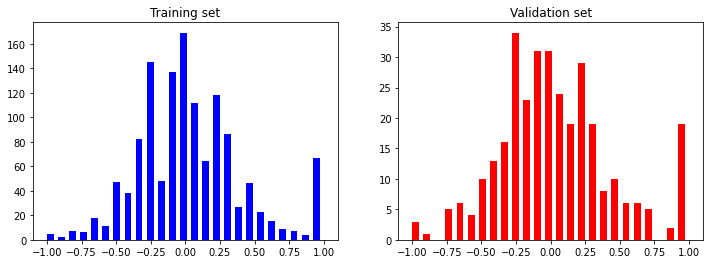

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12,4))
axes[0].hist(y_train, bins=num_bins, width=0.05, color='blue')
axes[0].set_title('Training set')
axes[1].hist(y_valid, bins=num_bins, width=0.05, color='red')
axes[1].set_title('Validation set')

In [ ]:
def img_preprocess(img):
  img=mpimg.imread(img)
  img=img[60:135,:,:]
  img=cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
  img=cv2.GaussianBlur(img, (3,3), 0)
  img=cv2.resize(img, (200, 66))
  img=img/255
  return img

Text(0.5, 1.0, 'Preprocessed Image')

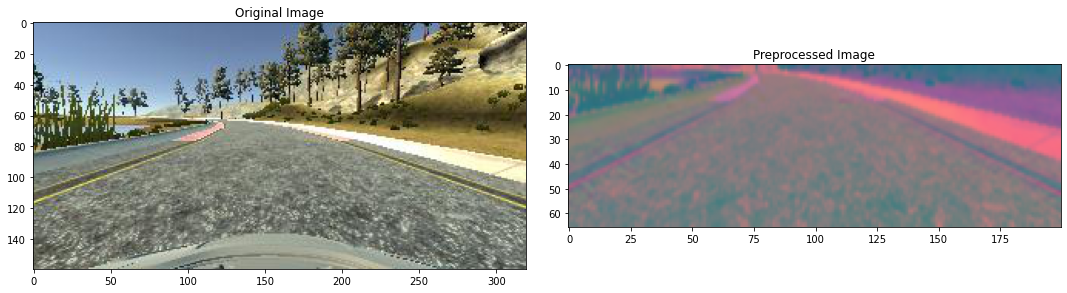

In [ ]:
image = image_paths[100]
original_image = mpimg.imread(image)
preprocessed_image = img_preprocess(image)

fig, axs= plt.subplots(1, 2, figsize=(15,10))
fig.tight_layout()
axs[0].imshow(original_image)
axs[0].set_title('Original Image')
axs[1].imshow(preprocessed_image)
axs[1].set_title('Preprocessed Image')

In [ ]:
X_train = np.array(list(map(img_preprocess, X_train)))
X_valid = np.array(list(map(img_preprocess, X_valid)))

(1293, 66, 200, 3)


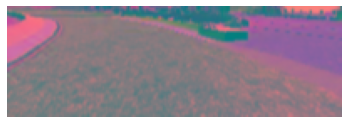

In [ ]:
plt.imshow(X_train[random.randint(0, len(X_train)-1)])
plt.axis('off')
print(X_train.shape)

In [ ]:
def nvidia_model():
 
  model = Sequential()
 
  model.add(Conv2D(24, kernel_size=(5,5), strides=(2,2), input_shape=(66,200,3),activation='elu'))
  model.add(Conv2D(36, kernel_size=(5,5), strides=(2,2), activation='elu'))
  model.add(Conv2D(48, kernel_size=(5,5), strides=(2,2), activation='elu'))
  model.add(Conv2D(64, kernel_size=(3,3), activation='elu'))
  model.add(Conv2D(64, kernel_size=(3,3), activation='elu'))
  model.add(Dropout(0.5))
 
  model.add(Flatten())
  model.add(Dense(100, activation='elu'))
  model.add(Dropout(0.5))
 
  model.add(Dense(50, activation='elu'))
  model.add(Dropout(0.5))
  
  model.add(Dense(10, activation ='elu'))
  model.add(Dropout(0.5))

  model.add(Dense(1))
 
  optimizer= Adam(lr=1e-3)
  model.compile(loss='mse', optimizer=optimizer)
 
  return model


In [ ]:
model = nvidia_model()
print(model.summary())

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 31, 98, 24)        1824      
                                                                 
 conv2d_16 (Conv2D)          (None, 14, 47, 36)        21636     
                                                                 
 conv2d_17 (Conv2D)          (None, 5, 22, 48)         43248     
                                                                 
 conv2d_18 (Conv2D)          (None, 3, 20, 64)         27712     
                                                                 
 conv2d_19 (Conv2D)          (None, 1, 18, 64)         36928     
                                                                 
 dropout_8 (Dropout)         (None, 1, 18, 64)         0         
                                                                 
 flatten_3 (Flatten)         (None, 1152)             

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
history = model.fit(X_train, y_train, epochs=30, validation_data= (X_valid, y_valid), batch_size=100, verbose=1, shuffle=1)

Epoch 1/30
13/13 [==============================] - 17s 1s/step - loss: 1.0817 - val_loss: 0.2733
Epoch 2/30
13/13 [==============================] - 15s 1s/step - loss: 0.3036 - val_loss: 0.1370
Epoch 3/30
13/13 [==============================] - 8s 624ms/step - loss: 0.1808 - val_loss: 0.1178
Epoch 4/30
13/13 [==============================] - 8s 627ms/step - loss: 0.1704 - val_loss: 0.1327
Epoch 5/30
13/13 [==============================] - 8s 630ms/step - loss: 0.1400 - val_loss: 0.1236
Epoch 6/30
13/13 [==============================] - 8s 630ms/step - loss: 0.1296 - val_loss: 0.1053
Epoch 7/30
13/13 [==============================] - 8s 632ms/step - loss: 0.1177 - val_loss: 0.1008
Epoch 8/30
13/13 [==============================] - 8s 633ms/step - loss: 0.1096 - val_loss: 0.0992
Epoch 9/30
13/13 [==============================] - 8s 636ms/step - loss: 0.1053 - val_loss: 0.0933
Epoch 10/30
13/13 [==============================] - 8s 635ms/step - loss: 0.1076 - val_loss: 0.0958
Epo

Text(0.5, 0, 'Epoch')

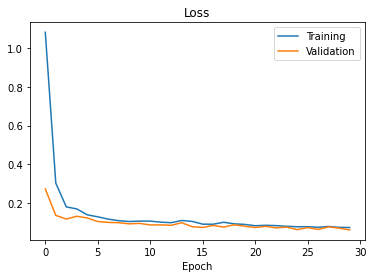

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training','Validation'])
plt.title('Loss')
plt.xlabel('Epoch')

In [ ]:
model.save('model.h5')

In [ ]:
from google.colab import files
files.download('model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>